Day WRF Mean Absolute Error: 0.0616814159292
Day WRF Mean Squared Error: 0.0188592920354
Day WRF Root Mean Squared Error: 0.137329137605
NWAC Day Mean Absolute Error: 0.0515044247788
NWAC Day Mean Squared Error: 0.0100778761062
NWAC Day Root Mean Squared Error: 0.100388625383
Night WRF Mean Absolute Error: 0.0958407079646
Night WRF Mean Squared Error: 0.0424203539823
Night WRF Root Mean Squared Error: 0.205962020728
NWAC Night Mean Absolute Error: 0.067610619469
NWAC Night Mean Squared Error: 0.0221575221239
NWAC Night Root Mean Squared Error: 0.148854029586


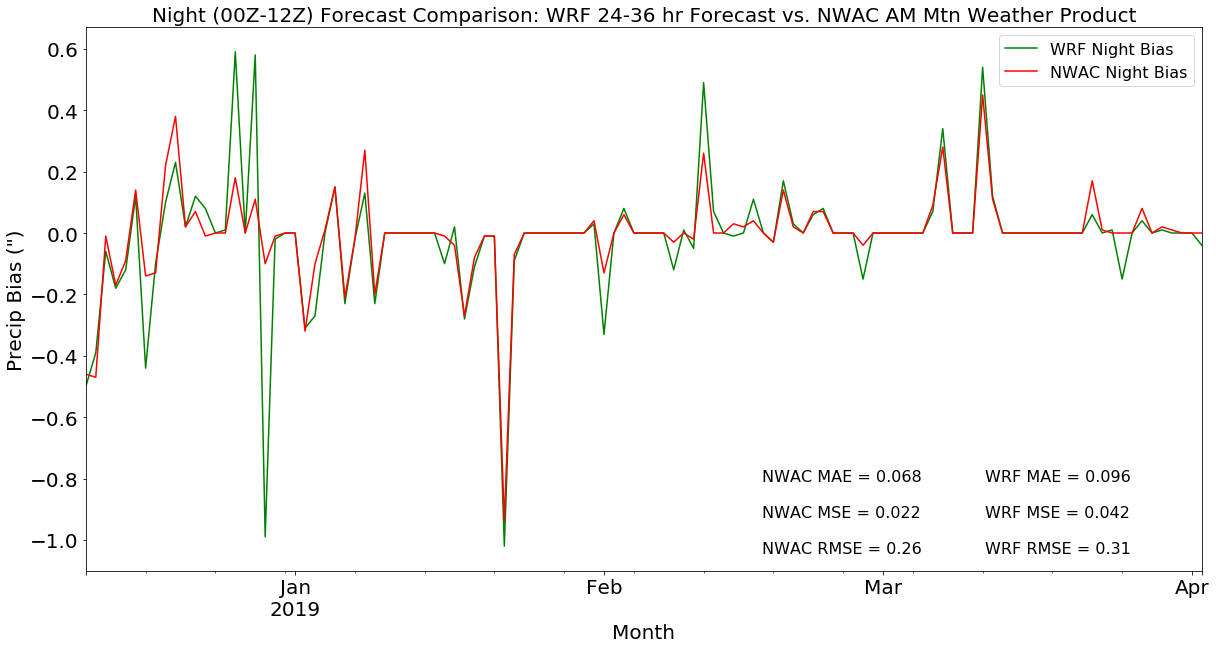

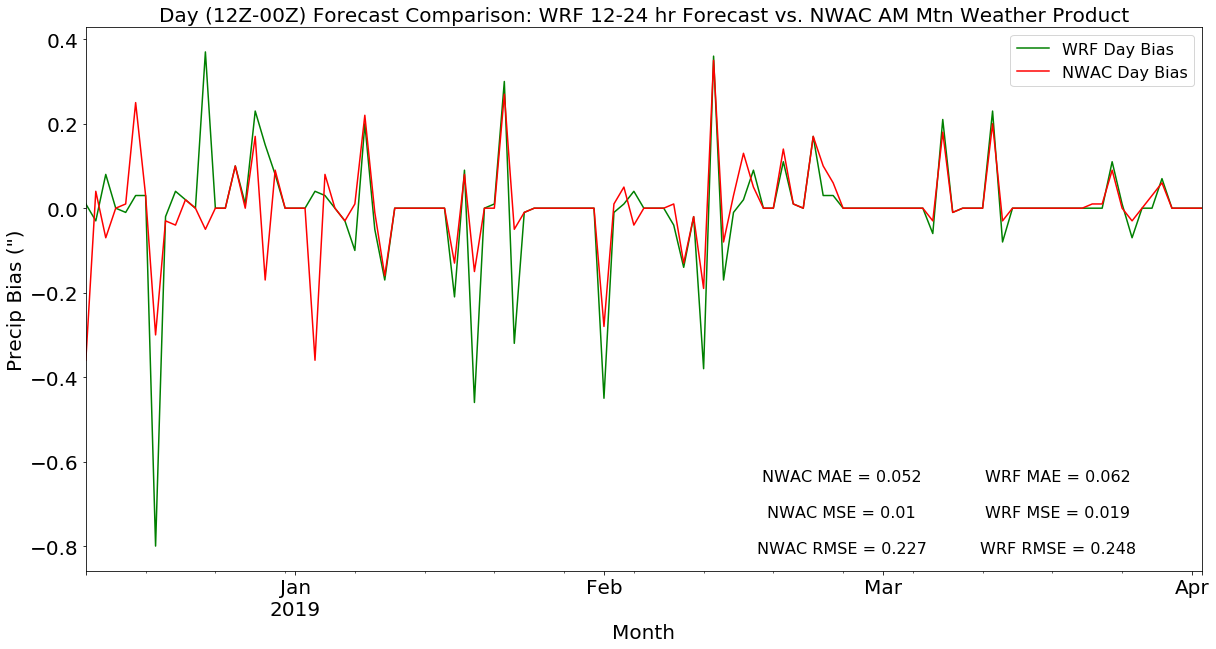

0.0701592561238 -0.0158072968223 0.221059817515 0.0186247043436 0.0293788101659


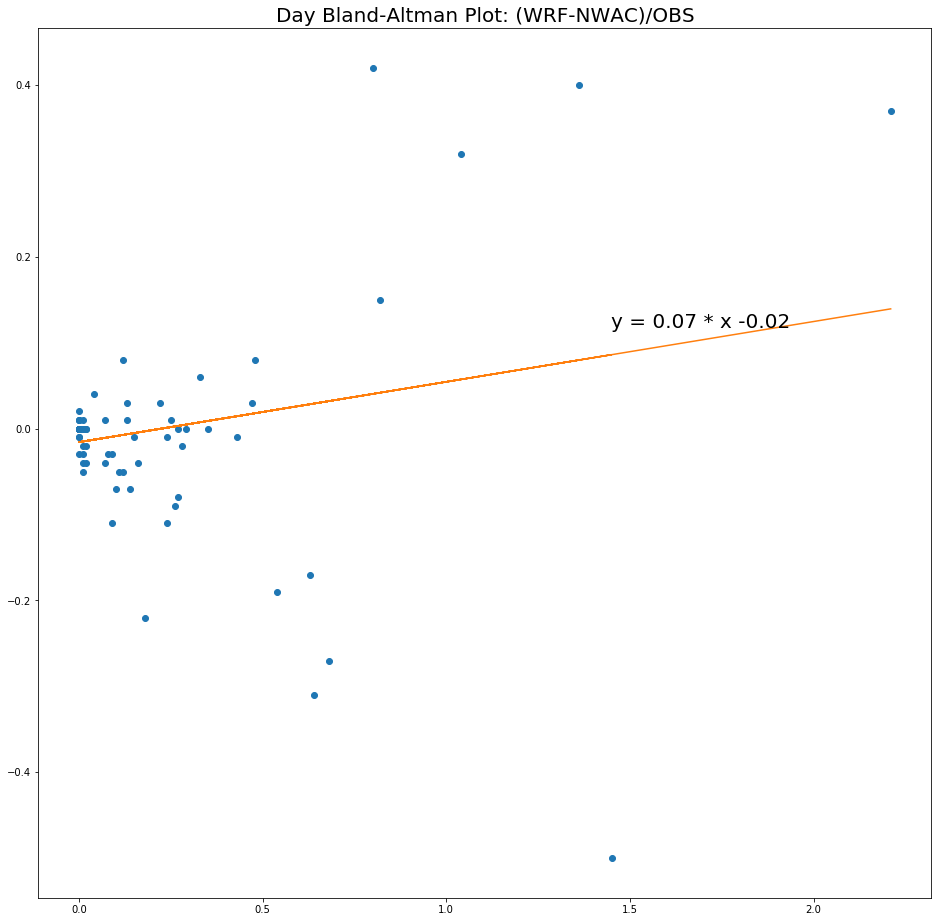

-0.0633640506574 0.000421372649359 -0.212353415684 0.0239414357487 0.0276759482159


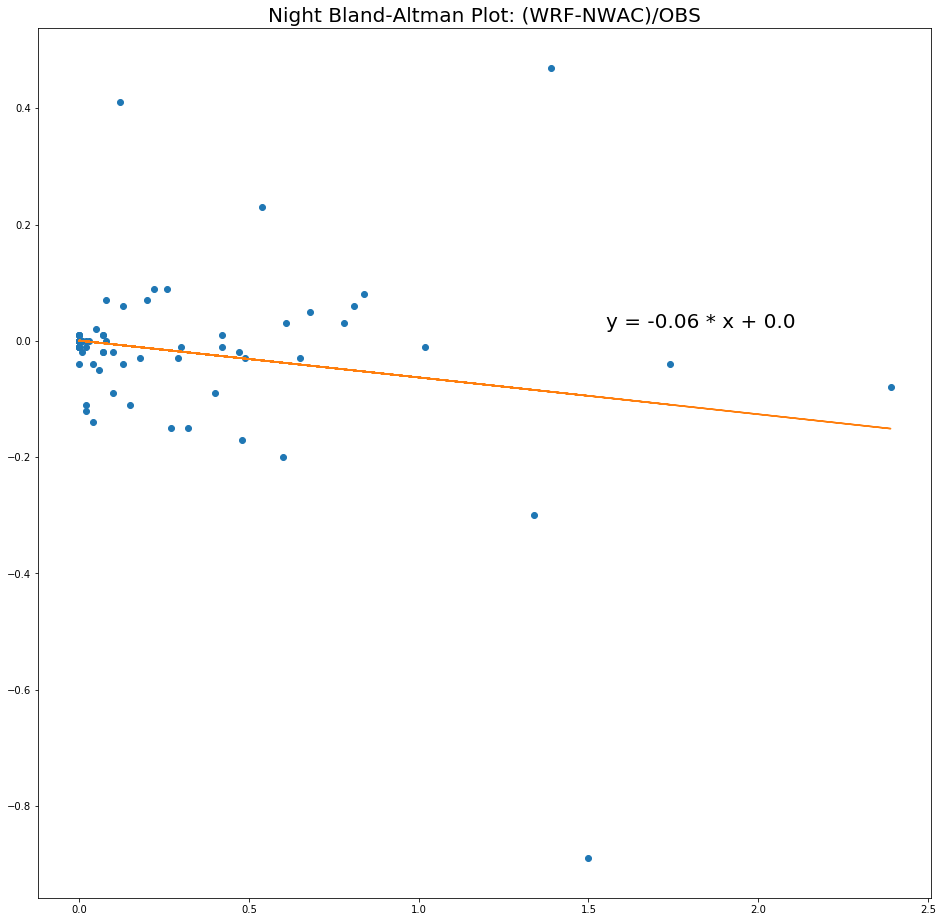

In [4]:
import datetime
from datetime import date
import seaborn as sns

#from datetime import date_range
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import os.path
plt.close("all")

def plotFigure(data_plot,file_name,order):
    fig = plt.figure(order, figsize=(9, 6))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_plot)
    fig.savefig(file_name, bbox_inches='tight')
    plt.close()
    
proj_dir   = '/Users/robertshahn/Documents/python-projects/wx_aval_repo/Snoq_Precip_Verification'
data_file = os.path.join(proj_dir,'SnoqVerification_AllData.csv')

#date_rng = pd.date_range(start='12/11/2018', end='4/30/2019', freq='D')
date_rng = pd.date_range(start='12/11/2018', end='4/2/2019', freq='D')

df = pd.read_csv(data_file)
df.columns = df.columns.str.strip() 
pd.options.display.float_format = '{:,.2f}'.format
#df.drop(['Unnamed: 0'], axis=1, inplace=True)

#df['WRF Day'].shape

df.truncate(after=112)
df['Date'] = date_rng
#print(df['Date'])
#print(df["WRF_Day"])
df = df.set_index('Date')
#print(df.index.values)
#df['WRF Day'].shape
#df.head(10)
# use the function regplot to make a scatterplot
#sns.regplot(x=df.index.values, y=df["WRF_Day"])
#sns.plt.show()
#lines = df.plot.line()
#plt.show()
#print(df['WRF_Day']).head(10)
df['WRF Day Bias']=df['WRF_Day']-df['OBS_Day']
df['NWAC Day Bias']=df['NWAC_Day']-df['OBS_Day']
df['WRF Night Bias']=df['WRF_Night']-df['OBS_Night']
df['NWAC Night Bias']=df['NWAC_Night']-df['OBS_Night']

#df['WRF_Day_Diff'].plot(figsize=(20,10), fontsize=20, color="green")
#df['NWAC_Day_Diff'].plot(figsize=(20,10), fontsize=20, color="red")
#plt.xlabel('Month', fontsize=20)
#plt.legend()
#plt.show()




from sklearn import metrics  
print('Day WRF Mean Absolute Error:', metrics.mean_absolute_error(df['WRF_Day'],df['OBS_Day']))  
print('Day WRF Mean Squared Error:', metrics.mean_squared_error(df['WRF_Day'],df['OBS_Day']))  
print('Day WRF Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df['WRF_Day'],df['OBS_Day']))) 

print('NWAC Day Mean Absolute Error:', metrics.mean_absolute_error(df['NWAC_Day'],df['OBS_Day']))  
print('NWAC Day Mean Squared Error:', metrics.mean_squared_error(df['NWAC_Day'],df['OBS_Day']))  
print('NWAC Day Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df['NWAC_Day'],df['OBS_Day']))) 

print('Night WRF Mean Absolute Error:', metrics.mean_absolute_error(df['WRF_Night'],df['OBS_Night']))  
print('Night WRF Mean Squared Error:', metrics.mean_squared_error(df['WRF_Night'],df['OBS_Night']))  
print('Night WRF Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df['WRF_Night'],df['OBS_Night']))) 

print('NWAC Night Mean Absolute Error:', metrics.mean_absolute_error(df['NWAC_Night'],df['OBS_Night']))  
print('NWAC Night Mean Squared Error:', metrics.mean_squared_error(df['NWAC_Night'],df['OBS_Night']))  
print('NWAC Night Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df['NWAC_Night'],df['OBS_Night'])))

fig = plt.figure(figsize=(16,16))
df['WRF Night Bias'].plot(figsize=(20,10), fontsize=20, color="green")
df['NWAC Night Bias'].plot(figsize=(20,10), fontsize=20, color="red")
plt.xlabel('Month', fontsize=20)
plt.ylabel('Precip Bias (")', fontsize=20)
plt.figtext(0.8, 0.25,"WRF MAE = " + str(round(metrics.mean_absolute_error(df['WRF_Night'],df['OBS_Night']),3)), wrap=True,
            horizontalalignment='center', fontsize=16)
plt.figtext(0.8, 0.2,"WRF MSE = " + str(round(metrics.mean_squared_error(df['WRF_Night'],df['OBS_Night']),3)), wrap=True,
            horizontalalignment='center', fontsize=16)
plt.figtext(0.8, 0.15,"WRF RMSE = " + str(round(np.sqrt(metrics.mean_absolute_error(df['WRF_Night'],df['OBS_Night'])),3)), 
            wrap=True, horizontalalignment='center', fontsize=16)
plt.figtext(0.65, 0.25,"NWAC MAE = " + str(round(metrics.mean_absolute_error(df['NWAC_Night'],df['OBS_Night']),3)), wrap=True,
            horizontalalignment='center', fontsize=16)
plt.figtext(0.65, 0.2,"NWAC MSE = " + str(round(metrics.mean_squared_error(df['NWAC_Night'],df['OBS_Night']),3)), wrap=True,
            horizontalalignment='center', fontsize=16)
plt.figtext(0.65, 0.15,"NWAC RMSE = " + str(round(np.sqrt(metrics.mean_absolute_error(df['NWAC_Night'],df['OBS_Night'])),3)), 
            wrap=True, horizontalalignment='center', fontsize=16)
plt.legend(fontsize=16)
plt.title("Night (00Z-12Z) Forecast Comparison: WRF 24-36 hr Forecast vs. NWAC AM Mtn Weather Product", fontsize=20)
plt.show()
fig.savefig(proj_dir+'/'+'Night_NWAC_WRF_Bias.png',dpi=180)
plt.close()
fig = plt.figure(figsize=(16,16))
df['WRF Day Bias'].plot(figsize=(20,10), fontsize=20, color="green")
df['NWAC Day Bias'].plot(figsize=(20,10), fontsize=20, color="red")
plt.xlabel('Month', fontsize=20)
plt.ylabel('Precip Bias (")', fontsize=20)
plt.figtext(0.8, 0.25,"WRF MAE = " + str(round(metrics.mean_absolute_error(df['WRF_Day'],df['OBS_Day']),3)), wrap=True,
            horizontalalignment='center', fontsize=16)
plt.figtext(0.8, 0.2,"WRF MSE = " + str(round(metrics.mean_squared_error(df['WRF_Day'],df['OBS_Day']),3)), wrap=True,
            horizontalalignment='center', fontsize=16)
plt.figtext(0.8, 0.15,"WRF RMSE = " + str(round(np.sqrt(metrics.mean_absolute_error(df['WRF_Day'],df['OBS_Day'])),3)), 
            wrap=True, horizontalalignment='center', fontsize=16)
plt.figtext(0.65, 0.25,"NWAC MAE = " + str(round(metrics.mean_absolute_error(df['NWAC_Day'],df['OBS_Day']),3)), wrap=True,
            horizontalalignment='center', fontsize=16)
plt.figtext(0.65, 0.2,"NWAC MSE = " + str(round(metrics.mean_squared_error(df['NWAC_Day'],df['OBS_Day']),3)), wrap=True,
            horizontalalignment='center', fontsize=16)
plt.figtext(0.65, 0.15,"NWAC RMSE = " + str(round(np.sqrt(metrics.mean_absolute_error(df['NWAC_Day'],df['OBS_Day'])),3)), 
            wrap=True, horizontalalignment='center', fontsize=16)
plt.legend(fontsize=16)
plt.title("Day (12Z-00Z) Forecast Comparison: WRF 12-24 hr Forecast vs. NWAC AM Mtn Weather Product", fontsize=20)
plt.show()
fig.savefig(proj_dir+'/'+'Day_NWAC_WRF_Bias.png',dpi=180)
plt.close()

fig = plt.figure(figsize=(16,16))
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['OBS_Day'], df['WRF_Day']-df['NWAC_Day'])
print(slope, intercept, r_value, p_value, std_err)
line = slope*df['OBS_Day']+intercept
plt.plot(df['OBS_Day'],df['WRF_Day']-df['NWAC_Day'],'o', df['OBS_Day'], line)
plt.figtext(0.7, 0.62,"y = " + str(round(slope,2)) + " * x " + str(round(intercept,2)), wrap=True,
            horizontalalignment='center', fontsize=20)
plt.title("Day Bland-Altman Plot: (WRF-NWAC)/OBS", fontsize=20)
fig.savefig(proj_dir+'/'+'Day_Bland_Altman_WRFvsNWACagainstOBS.png',dpi=180)
plt.show()
plt.close()

fig = plt.figure(figsize=(16,16))
slope, intercept, r_value, p_value, std_err = stats.linregress(df['OBS_Night'], df['WRF_Night']-df['NWAC_Night'])
print(slope, intercept, r_value, p_value, std_err)
line = slope*df['OBS_Night']+intercept
plt.plot(df['OBS_Night'],df['WRF_Night']-df['NWAC_Night'],'o', df['OBS_Night'], line)
plt.figtext(0.7, 0.62,"y = " + str(round(slope,2)) + " * x + " + str(round(intercept,2)), wrap=True,
            horizontalalignment='center', fontsize=20)
plt.title("Night Bland-Altman Plot: (WRF-NWAC)/OBS", fontsize=20)
fig.savefig(proj_dir+'/'+'Night_Bland_Altman_WRFvsNWACagainstOBS.png',dpi=180)
plt.show()

#df['WRF_Night_Diff'].scatter(figsize=(20,10), fontsize=20, color="green")
#df['NWAC_Night_Diff'].scatter(figsize=(20,10), fontsize=20, color="red")
#plt.xlabel('Month', fontsize=20)
#plt.legend()
#plt.show()

#df['WRF_Day'].plot(figsize=(20,10), fontsize=20, color="black")
#df['NWAC_Day'].plot(figsize=(20,10), fontsize=20, color="magenta")
#df['Obs_Day'].plot(figsize=(20,10), fontsize=20, color="g")
#fig = plt.figure()
#plt.scatter(df.index.values, df['OBS_Day'], s=2, c="r")
#plt.scatter(df.index.values, df['WRF_Day'], s=2, c="b")
#plt.scatter(df.index.values, df['NWAC_Day'], s=2, c="g")
#plt.title("Day")
#plt.xlabel('Month',size=8)
#plt.xaxislabel(rotation='vertical')
#plt.ylabel('Precip')
#plt.show()
#fig.savefig(proj_dir+'/'+'Day.png',dpi=180)
#plt.close()

#fig = plt.figure()
#plt.scatter(df['WRF_Day'], df['OBS_Day'], s=120, c='b', label='WRF')
#plt.scatter(df['NWAC_Day'], df['OBS_Day'], s=60, c='r', label='NWAC') 
#plt.legend()
#plt.scatter(df['WRF_Day'], df['NWAC_Day'])

#ax1 = df.plot.scatter(x=df['Date'], y=df['WRF Day'], c='DarkBlue')
#ax2 = df.plot.scatter(x=df['Date'], y=df['NWAC Day'], c='Green')


0.905342129493 0.0108846168669 0.911261756172 1.41675985447e-44 0.038835025668
the slope is0.905342129493
the intercept is0.0108846168669
0.835182873369 0.0266919136892 0.955142173418 1.71902988614e-60 0.0245787818428
the NWAC slope is 0.835182873369
the NWAC intercept is 0.0266919136892


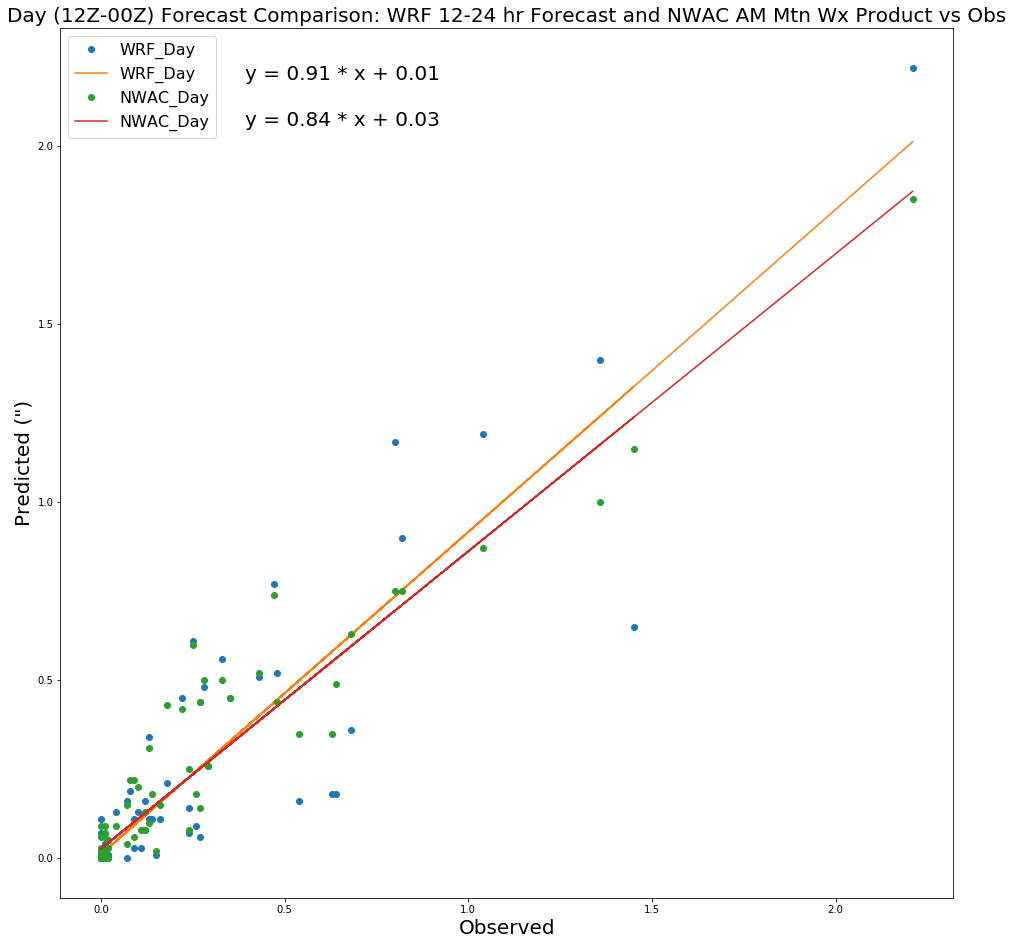

In [5]:
plt.close()
from scipy import stats
fig = plt.figure(figsize=(16,16))
#plt.plot(df['WRF_Day'], df['OBS_Day'], 'o', markersize=2, color='red')
#plt.plot(df['NWAC_Day'], df['OBS_Day'], 'o', markersize=2, color='blue')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['OBS_Day'], df['WRF_Day'])
print(slope, intercept, r_value, p_value, std_err)
print("the slope is" + str(slope))
print("the intercept is" + str(intercept))
line = slope*df['OBS_Day']+intercept
plt.plot(df['OBS_Day'], df['WRF_Day'],'o', df['OBS_Day'], line)
plt.figtext(0.37, 0.835,"y = " + str(round(slope,2)) + " * x + " + str(round(intercept,2)), wrap=True,
            horizontalalignment='center', fontsize=20)
slope_nwac, intercept_nwac, r_value_nwac, p_value_nwac, std_err_nwac = stats.linregress(df['OBS_Day'], df['NWAC_Day'])
print(slope_nwac, intercept_nwac, r_value_nwac, p_value_nwac, std_err_nwac)
line_nwac = slope_nwac*df['OBS_Day']+intercept_nwac
plt.figtext(0.37, 0.795,"y = " + str(round(slope_nwac,2)) + " * x + " + str(round(intercept_nwac,2)), wrap=True,
            horizontalalignment='center', fontsize=20)
plt.plot(df['OBS_Day'], df['NWAC_Day'],'o', df['OBS_Day'], line_nwac)
plt.xlabel('Observed', fontsize=20)
plt.ylabel('Predicted (")', fontsize=20)
plt.legend(fontsize=16)
plt.title("Day (12Z-00Z) Forecast Comparison: WRF 12-24 hr Forecast and NWAC AM Mtn Wx Product vs Obs", fontsize=20)

print("the NWAC slope is " + str(slope_nwac))
print("the NWAC intercept is " + str(intercept_nwac))
plt.show()
fig.savefig(proj_dir+'/'+'Scatter_Day.png',dpi=180)

0.712293343058 0.0370220135226 0.854035798329 2.76463524047e-33 0.0411816323162
the slope is0.712293343058
the intercept is0.0370220135226
0.835182873369 0.0266919136892 0.955142173418 1.71902988614e-60 0.0245787818428
the NWAC slope is 0.835182873369
the NWAC intercept is 0.0266919136892


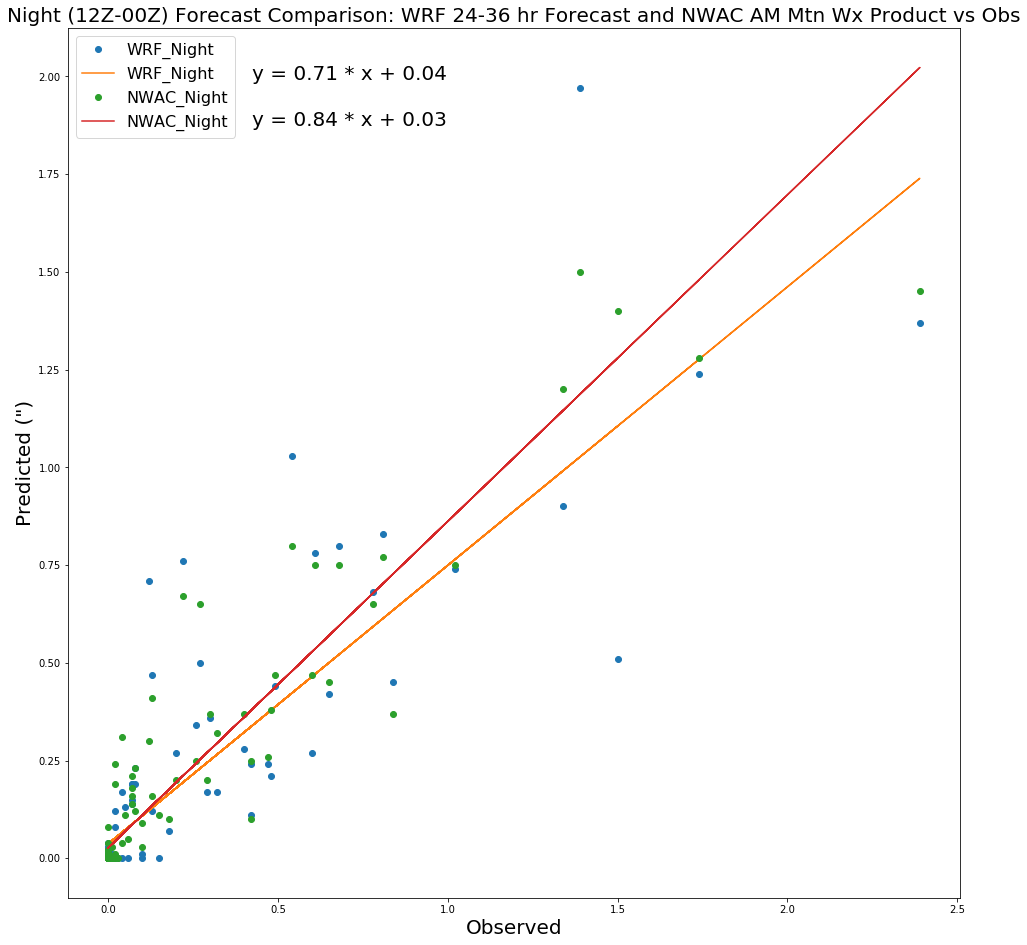

In [6]:
plt.close()
from scipy import stats
fig = plt.figure(figsize=(16,16))
slope, intercept, r_value, p_value, std_err = stats.linregress(df['OBS_Night'], df['WRF_Night'])
print(slope, intercept, r_value, p_value, std_err)
print("the slope is" + str(slope))
print("the intercept is" + str(intercept))
line = slope*df['OBS_Night']+intercept
plt.plot(df['OBS_Night'], df['WRF_Night'],'o', df['OBS_Night'], line)
plt.figtext(0.37, 0.835,"y = " + str(round(slope,2)) + " * x + " + str(round(intercept,2)), wrap=True,
            horizontalalignment='center', fontsize=20)
slope_nwac, intercept_nwac, r_value_nwac, p_value_nwac, std_err_nwac = stats.linregress(df['OBS_Day'], df['NWAC_Day'])
print(slope_nwac, intercept_nwac, r_value_nwac, p_value_nwac, std_err_nwac)
line_nwac = slope_nwac*df['OBS_Night']+intercept_nwac
plt.figtext(0.37, 0.795,"y = " + str(round(slope_nwac,2)) + " * x + " + str(round(intercept_nwac,2)), wrap=True,
            horizontalalignment='center', fontsize=20)
plt.plot(df['OBS_Night'], df['NWAC_Night'],'o', df['OBS_Night'], line_nwac)
plt.xlabel('Observed', fontsize=20)
plt.ylabel('Predicted (")', fontsize=20)
plt.legend(fontsize=16)
plt.title("Night (12Z-00Z) Forecast Comparison: WRF 24-36 hr Forecast and NWAC AM Mtn Wx Product vs Obs", fontsize=20)

print("the NWAC slope is " + str(slope_nwac))
print("the NWAC intercept is " + str(intercept_nwac))
plt.show()
fig.savefig(proj_dir+'/'+'Scatter_Night.png',dpi=180)